# Introduction:
 as new data scientist in hte company my first task in this company is to develop end to end pipeline for the below this dataset.

This dataset include; Age, Gender, Education Level, Job Tittle, Years of experience and Salary.

# **Business problem**:

The prediction of the salary depends on Educational Level, Job Title and Years of experience


Here we are going to importing all the libraries that we need for this work.

# Import Data

In [ ]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import sklearn.compose
import sklearn.svm
import sklearn.metrics
import sklearn.tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Import Dataset

In [ ]:
df = pd.read_csv("/content/Salary Data.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Here we diplay the 5 rows for our dataframe

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


We use this method to understand the distrubition of characteristics of our data in dataframe it will help as to get a quick overview of our dataset, and this is very important for data analysis.

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


we check the missing values

In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [ ]:
df.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


50

we check if we have null values and to drop it

In [ ]:
df1 = df.dropna()
df1.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


Dropping the nulls values

In [ ]:
print(df.isnull().sum())
df = df.dropna()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The names of the columns

In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

# EDA

In [ ]:
df1['Age'].unique()
df1['Gender'].unique()
df1['Education Level'].unique()
df1['Job Title'].unique()
df1.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [ ]:
df['Education Level'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Education Level,
Bachelor's,224
Master's,98
PhD,51


To check the values of Job Tittle

In [ ]:
df['Job Title'].value_counts().sort_values(ascending=False)[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Job Title,
Director of Marketing,12
Director of Operations,11
Senior Business Analyst,10
Senior Marketing Analyst,9
Senior Marketing Manager,9
Junior Business Analyst,8
Senior Project Manager,7
Senior Data Scientist,7
Junior Business Development Associate,7


Data visualization:
Creating a chart with 10 and 6 inches with x axis as count and y axis as job title. with 0 rotation to make it easy to read.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


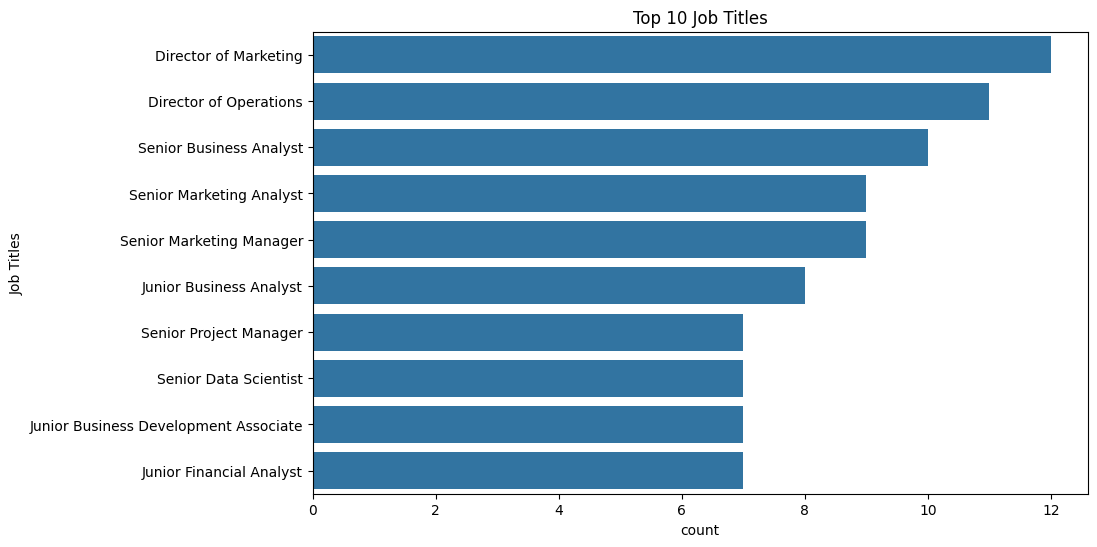

In [ ]:
plt.figure(figsize=(10, 6))
top_ = df['Job Title'].value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=top_.values, y=top_.index)
plt.title('Top 10 Job Titles')
plt.xlabel('count')
plt.ylabel('Job Titles')
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


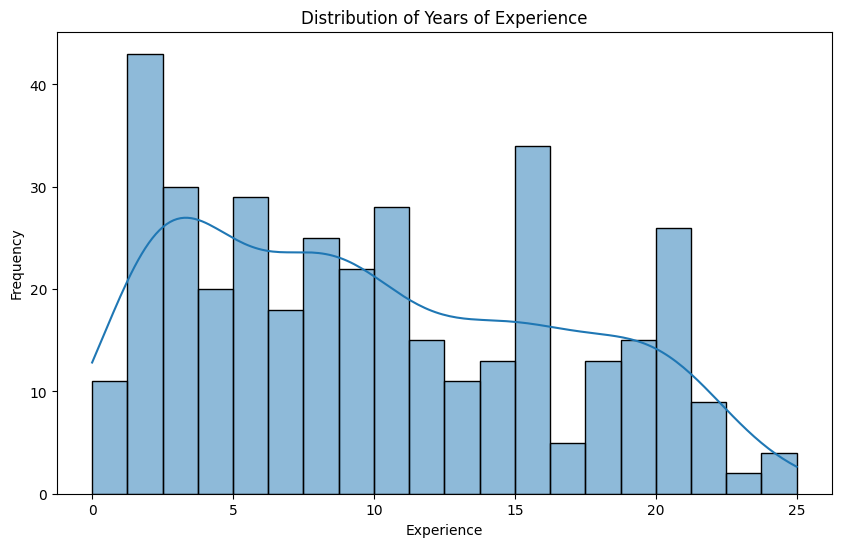

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Years of Experience'], kde=True, bins=20)
plt.title('Distribution of Years of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()

To convert the categorical values into numrical

In [ ]:
label_encoder = LabelEncoder()
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,0,Software Engineer,5.0,90000.0
1,28.0,Female,1,Data Analyst,3.0,65000.0
2,45.0,Male,2,Senior Manager,15.0,150000.0
3,36.0,Female,0,Sales Associate,7.0,60000.0
4,52.0,Male,1,Director,20.0,200000.0


# Data splitting into training and testing

In [ ]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df-size", df.shape)
print("df_train-size",df_train.shape)
print("df_test-size",df_test.shape)

df-size (373, 6)
df_train-size (279, 6)
df_test-size (94, 6)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Split the data into training and testing with random states of 40, into 20% and 80%

In [ ]:
X = df.drop(columns=["Salary", "Gender"])
y = df["Salary"]
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.2, random_state = 40)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


check the shape of training and testing data

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(298, 4)
(75, 4)
(298,)
(75,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Model 1- KNN

In the below code, I used the categorical data to train my model using KNN. Then calulated the mean absolute percentage(mape), then got the percentage of the accuracy in a percentage form.

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)
model2 = KNeighborsRegressor()
model2.fit(X_train_encoded, y_train)
y_pred2 = model2.predict(X_test_encoded)
error2 = mean_absolute_percentage_error(y_test, y_pred2)
knn_result = (1 - error2) * 100
knn_result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


88.33420464296626

# Model2- SVM

The code that we are using here convert the categorical data into a numerical data both of them the training and testing, after that we train the SVR model with use of the training data. it use test data to make the prediction, calculate the prediction error and after that we use this error to determine the accuracy for the model.

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)
model_svr = SVR()
model_svr.fit(X_train_encoded, y_train)
y_pred_svr = model_svr.predict(X_test_encoded)
error_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
acc_svr = (1 - error_svr) * 100
acc_svr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


50.749395894024076

# Model3- Desicion Tree

In the below code (the categorical) I used the desicion tree model, started by aligning the training and testing data, then making the prdiction in a percentage form.

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)
model3 = DecisionTreeRegressor()
model3.fit(X_train_encoded, y_train)
y_pred3 = model3.predict(X_test_encoded)
error3 = mean_absolute_percentage_error(y_test, y_pred3)
acc3 = (1 - error3) * 100
acc3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


90.3271719164908

# Model4 - Random Forest

Started by changing the categorical one into numerical values. then i used the random forest model, then used the percentage form for the accuracy

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)
model4 = RandomForestRegressor()
model4.fit(X_train_encoded, y_train)
y_pred4 = model4.predict(X_test_encoded)
error4 = mean_absolute_percentage_error(y_test, y_pred4)
acc4 = (1 - error4) * 100
acc4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


90.27507595588933

# The accuracy for the models

In [ ]:
print("accuracy of SVM is ", acc_svr)
print("accuracy of KNeighbors Regressor is ", knn_result)
print("accuracy of DecisionTree Regressor is ", acc3)
print("accuracy of RandomForest Regressor is ", acc4)

accuracy of SVM is  50.749395894024076
accuracy of KNeighbors Regressor is  88.33420464296626
accuracy of DecisionTree Regressor is  90.3271719164908
accuracy of RandomForest Regressor is  90.27507595588933


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Conclusion:
- The decision tree model have the highest accuracy among the other models.
- there is a clear positive corelation between years of experience and salary.
- The role and responsibility within a company play a crucial role in determining salary level.

# **REFERENCE**:
Here are the references used for this project:

https://www.kaggle.com/code/drgilermo/salary-analysis/notebook

